In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Data loading and preprocessing
data = pd.read_csv("CARS_1.csv")

# Calculate horsepower and add it to data frame
data["horsepower"] = round((data["max_torque_rpm"] * data["max_torque_nm"]) / 7127, 2)

# Removing unnessacry features
data = data.drop(columns=['reviews_count' ,'rating', "starting_price", "ending_price", 'fuel_type', 'transmission_type', 'fuel_tank_capacity', 'max_power_rp'])

# Standardization
# store string data in a separate dataframe
data_str = data[data.select_dtypes(include=object).columns]

data_num = data.drop(columns=data.select_dtypes(include=object).columns)

# calculate mean and standard deviation of the data
mean = data_num.mean()
std_dev = data_num.std()

# Standradize the data
data_num = (data_num - mean) /std_dev

# add the string data
data = pd.concat([data_str, data_num], axis=1)

data_num

,engine_displacement,no_cylinder,seating_capacity,max_torque_nm,max_torque_rpm,max_power_bhp,horsepower
0,-0.875544,-0.673330,-0.012791,-1.323420,0.096236,-1.038207,-0.849918
1,-0.564935,-0.279422,-0.012791,-1.121831,0.660513,-0.852447,-0.617480
2,-0.081616,-0.279422,-0.874081,-0.433562,-0.342646,-0.705916,-0.426967
3,-0.072244,-0.279422,1.709787,0.199038,-0.342646,-0.435183,-0.090831
4,-0.072244,-0.279422,1.709787,-0.011829,-0.373995,-0.486508,-0.218886
...,...,...,...,...,...,...,...
198,-0.210814,-0.279422,-0.012791,0.409904,1.193442,0.770814,1.001653
199,-0.206128,-0.279422,-0.012791,-0.011829,0.660513,-0.060923,0.309360
200,-0.234243,-0.279422,1.709787,-0.222696,-0.530739,-0.511214,-0.398961
201,1.132706,1.296210,-0.012791,1.675105,0.723211,1.678839,1.781958


In [5]:
# The PCA algorithm
# calculating the covariance of all numerical data and storing as a dataframe
covariance = pd.DataFrame(data_num.cov())

# performing the eigen decompoistion of the covariance dataframe 
eigenvalues, eigenvectors = np.linalg.eig(covariance) 

# sorting descendingly
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

#  extract the two most important components
top_eigenvectors = [pair[1] for pair in eigen_pairs[:2]]

#  create the projection matrix
proj_matrix = np.hstack([vec.reshape(data_num.shape[1], 1) for vec in top_eigenvectors])

# get the final reduced form of the original data
reduced_data = data_num.dot(proj_matrix)

reduced_data

,0,1
0,-1.972964,-0.826620
1,-1.270721,-1.194634
2,-0.720076,-0.089702
3,-0.731380,0.336809
4,-0.899881,0.267238
...,...,...
198,1.019133,-0.661339
199,0.064124,-0.578616
200,-1.180908,0.313815
201,3.379918,0.320964


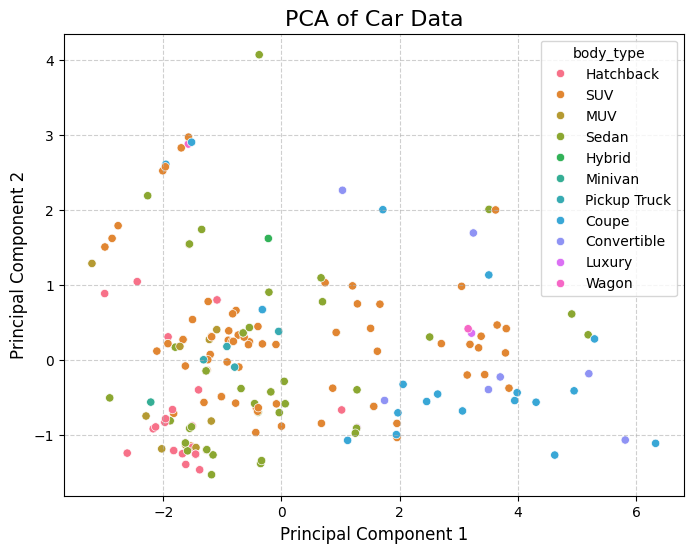

In [6]:
# Represent the data
plt.figure(figsize=(8, 6))

reduced_data = pd.concat([data_str['body_type'], reduced_data], axis=1)

# plt.scatter(reduced_data[0], reduced_data[1], s=100, alpha=0.7)
sns.scatterplot(x=reduced_data[0], y=reduced_data[1], hue=reduced_data['body_type'])

# Add titles and labels
plt.title('PCA of Car Data', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()